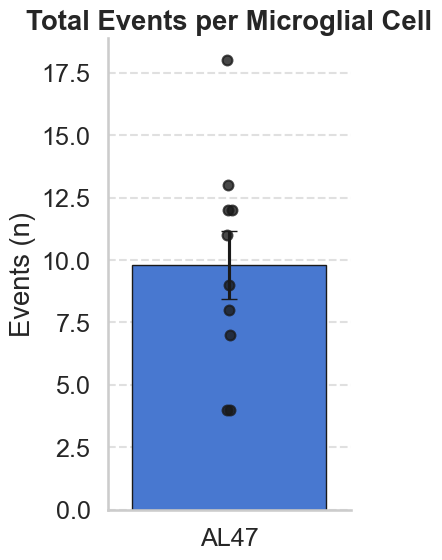

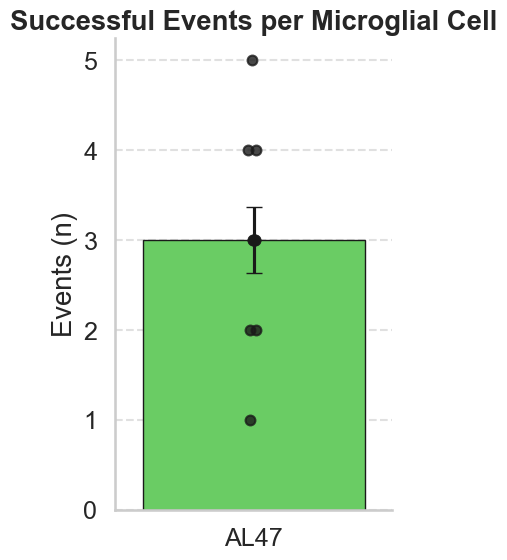

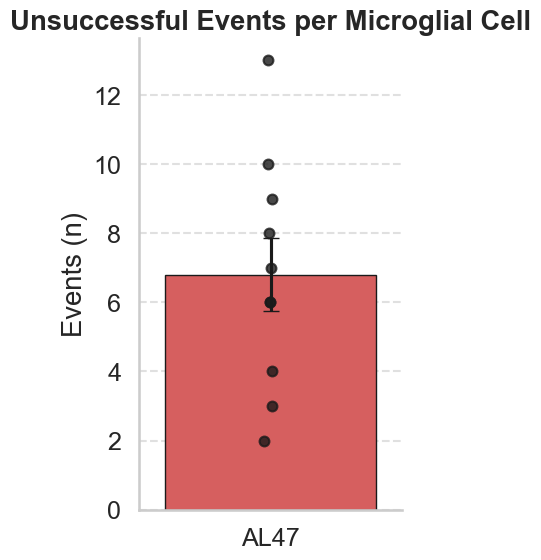

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Apply a professional Seaborn style
sns.set(style='whitegrid', context='talk', font_scale=1.1)
palette = sns.color_palette('muted')  # muted pastel palette

# Load the Excel file
df = pd.read_excel('/Users/alexlawson/Masters-Data-Final/Live-imaging/Results/testing-phag.xlsx')
df.columns = df.columns.str.strip()
df['Clear engulfment'] = df['Clear engulfment'].astype(str).str.strip().str.lower()

# Ensure consistent order of cell IDs
cell_ids = df['Cell ID'].unique()

# Helper to count unique Event IDs per cell
def count_events(sub_df):
    return (
        sub_df
        .groupby('Cell ID')['Event ID']
        .nunique()
        .reindex(cell_ids, fill_value=0)
    )

# Compute series
total_events        = count_events(df)
successful_events   = count_events(df[df['Clear engulfment'] == 'yes'])
unsuccessful_events = count_events(df[df['Clear engulfment'] == 'no'])

def plot_single_bar_with_points(data, title, ylabel, bar_color):
    mean_val = data.mean()
    sem_val  = data.sem()

    fig, ax = plt.subplots(figsize=(4,6))

    # Bar + SEM
    ax.bar(
        0, mean_val,
        yerr=sem_val,
        capsize=6,
        color=bar_color,
        edgecolor='k',
        linewidth=1
    )

    # Individual cells
    x_jitter = np.random.normal(0, 0.01, size=len(data))
    ax.scatter(
        x_jitter, data.values,
        color='k',
        s=50,
        alpha=0.8,
        zorder=5
    )

    # Styling
    ax.set_xticks([0])
    ax.set_xticklabels(['AL47'])
    ax.set_ylabel(ylabel)
    ax.set_title(title, weight='bold')
    ax.set_xlim(-0.5, 0.5)

    # Clean up spines & add subtle grid
    sns.despine(ax=ax, top=True, right=True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.grid(False)

    plt.tight_layout()
    plt.show()

# Plot them with a coherent color scheme
plot_single_bar_with_points(
    total_events,
    'Total Events per Microglial Cell',
    'Events (n)',
    bar_color=palette[0]
)

plot_single_bar_with_points(
    successful_events,
    'Successful Events per Microglial Cell',
    'Events (n)',
    bar_color=palette[2]
)

plot_single_bar_with_points(
    unsuccessful_events,
    'Unsuccessful Events per Microglial Cell',
    'Events (n)',
    bar_color=palette[3]
)


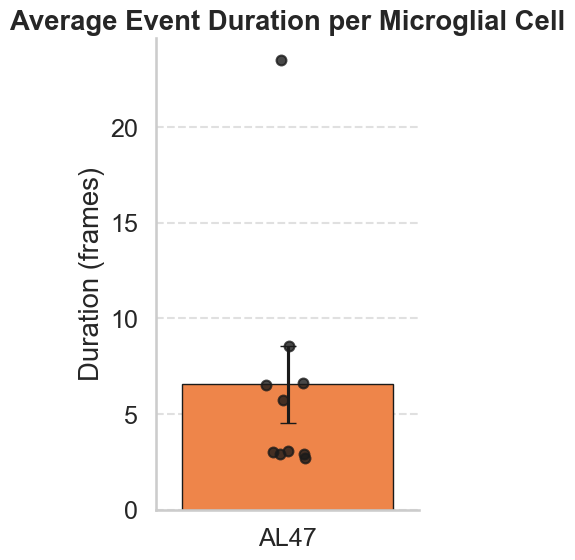

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Apply a professional Seaborn style
sns.set(style='whitegrid', context='talk', font_scale=1.1)
palette = sns.color_palette('muted')

# Load your data (make sure df is already defined from before)
# e.g., df = pd.read_excel('your_data.xlsx')

# Calculate event duration
df['Duration'] = df['Frame End'] - df['Frame Start']

# Compute mean duration per cell
cell_ids = df['Cell ID'].unique()
duration_per_cell = (
    df
    .groupby('Cell ID')['Duration']
    .mean()
    .reindex(cell_ids, fill_value=0)
)

def plot_duration_bar(data, title, ylabel, bar_color):
    mean_val = data.mean()
    sem_val  = data.sem()

    fig, ax = plt.subplots(figsize=(4, 6))

    # Bar + SEM
    ax.bar(
        0, mean_val,
        yerr=sem_val,
        capsize=6,
        color=bar_color,
        edgecolor='k',
        linewidth=1
    )

    # Individual cells as dots
    x_jitter = np.random.normal(0, 0.04, size=len(data))
    ax.scatter(
        x_jitter, data.values,
        color='k',
        s=50,
        alpha=0.8,
        zorder=5
    )

    # Labels & title
    ax.set_xticks([0])
    ax.set_xticklabels(['AL47'])
    ax.set_ylabel(ylabel)
    ax.set_title(title, weight='bold')
    ax.set_xlim(-0.5, 0.5)

    # Clean up spines & add subtle grid
    sns.despine(ax=ax, top=True, right=True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.grid(False)

    plt.tight_layout()
    plt.show()

# Plot average duration with the muted palette
plot_duration_bar(
    duration_per_cell,
    'Average Event Duration per Microglial Cell',
    'Duration (frames)',
    bar_color=palette[1]
)


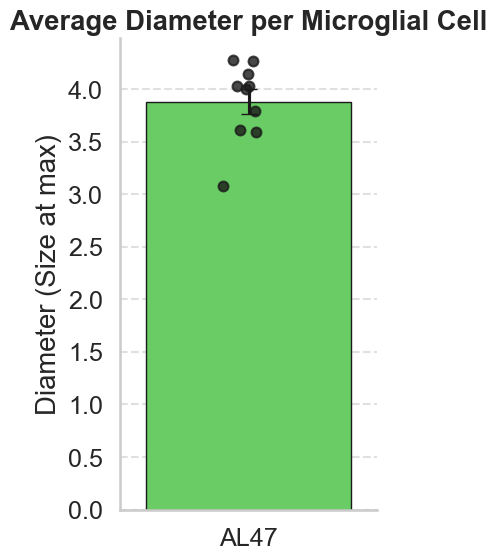

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Apply a professional Seaborn style
sns.set(style='whitegrid', context='talk', font_scale=1.1)
palette = sns.color_palette('muted')

# -- assume df is already loaded from your Excel file earlier --

# Compute mean diameter per cell
cell_ids = df['Cell ID'].unique()
diameter_per_cell = (
    df
    .groupby('Cell ID')['Size at max']
    .mean()
    .reindex(cell_ids, fill_value=0)
)

def plot_avg_diameter(data, title, ylabel, bar_color):
    mean_val = data.mean()
    sem_val  = data.sem()

    fig, ax = plt.subplots(figsize=(4, 6))

    # Bar + SEM
    ax.bar(
        0, mean_val,
        yerr=sem_val,
        capsize=6,
        color=bar_color,
        edgecolor='k',
        linewidth=1
    )

    # Individual cells as dots
    x_jitter = np.random.normal(0, 0.04, size=len(data))
    ax.scatter(
        x_jitter, data.values,
        color='k',
        s=50,
        alpha=0.8,
        zorder=5
    )

    # Labels & title
    ax.set_xticks([0])
    ax.set_xticklabels(['AL47'])
    ax.set_ylabel(ylabel)
    ax.set_title(title, weight='bold')
    ax.set_xlim(-0.5, 0.5)

    # Clean up spines & add subtle grid
    sns.despine(ax=ax, top=True, right=True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.grid(False)

    plt.tight_layout()
    plt.show()

# Plot average diameter with a muted color (e.g., palette[2])
plot_avg_diameter(
    diameter_per_cell,
    'Average Diameter per Microglial Cell',
    'Diameter (Size at max)',
    bar_color=palette[2]
)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1) Professional styling ----
sns.set(style='whitegrid', context='talk', font_scale=1.1)
palette = ['#D62728','#2CA02C','#1F77B4','#000000']  # red, green, blue, black

# ---- 2) Load or assume your DataFrame ----
# For example:
df = pd.read_excel('/Users/alexlawson/Masters-Data-Final/Live-imaging/Results/SPOTS/Microglia01_Statistics/Microglia01_Velocity.csv')
# And it already has columns: 'Time', 'Velocity X', 'Velocity Y', 'Velocity Z'

# ---- 3) Convert frame number to actual time ----
df['Time_min'] = df['Time'] * 8  # each frame = 8 minutes

# ---- 4) Compute overall speed ----
df['Speed'] = np.sqrt(
    df['Velocity X']**2 +
    df['Velocity Y']**2 +
    df['Velocity Z']**2
)

# ---- 5) Melt into long form ----
vel_df = df.melt(
    id_vars='Time_min',
    value_vars=['Velocity X','Velocity Y','Velocity Z','Speed'],
    var_name='Component',
    value_name='Velocity'
)

# ---- 6) Plot all four traces ----
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=vel_df,
    x='Time_min',
    y='Velocity',
    hue='Component',
    palette=palette,
    linewidth=2.0
)

plt.xlabel('Time (minutes)')
plt.ylabel('Velocity (units/min)')
plt.title('3D Velocity Components and Overall Speed over Time', weight='bold')
sns.despine()
plt.legend(title='', loc='upper right')
plt.tight_layout()
plt.show()
